# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data_weatherpy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Blank lists

city_list = []
country = []
latitude = []
longitude = []

cloud = []
humidity = []
max_temperature = []
wind_speed = []
date = []




#Counters
index_counter = 0
set_counter = 1

print('-------------------------')
print("Beginning Data Retrieval ")
print('-------------------------')


#URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="



#Loop to match the city names with the list of cities 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        
        city_list.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        
        
        cloud.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        
        
        
        
        if  index_counter < 50:
            index_counter += 1
        else:
            set_counter += 1
            index_counter = 0
        

    
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("Error: No such city")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

-------------------------
Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 : vaini
Processing Record 2 of Set 1 : cap malheureux
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : ugoofaaru
Processing Record 5 of Set 1 : acarau
Processing Record 6 of Set 1 : ushuaia
Processing Record 7 of Set 1 : castro
Processing Record 8 of Set 1 : saint anthony
Processing Record 9 of Set 1 : bambous virieux
Processing Record 10 of Set 1 : norman wells
Processing Record 11 of Set 1 : sioux lookout
Processing Record 12 of Set 1 : qaanaaq
Processing Record 13 of Set 1 : bengkulu
Processing Record 14 of Set 1 : hami
Processing Record 15 of Set 1 : yellowknife
Processing Record 16 of Set 1 : tasiilaq
Processing Record 17 of Set 1 : jamestown
Processing Record 18 of Set 1 : pevek
Processing Record 19 of Set 1 : payakumbuh
Processing Record 20 of Set 1 : mount isa
Error: No such city
Processing Record 21 of Set 1 : georgetown
Processing Record 22 of Set 1 : 

Processing Record 37 of Set 4 : anzio
Error: No such city
Processing Record 38 of Set 4 : half moon bay
Processing Record 39 of Set 4 : maryborough
Processing Record 40 of Set 4 : petropavlovsk-kamchatskiy
Processing Record 41 of Set 4 : lorengau
Processing Record 42 of Set 4 : paamiut
Processing Record 43 of Set 4 : eenhana
Processing Record 44 of Set 4 : saldanha
Processing Record 45 of Set 4 : grindavik
Processing Record 46 of Set 4 : ribas do rio pardo
Processing Record 47 of Set 4 : cayenne
Processing Record 48 of Set 4 : parkersburg
Processing Record 49 of Set 4 : nemuro
Processing Record 50 of Set 4 : lata
Processing Record 0 of Set 5 : lebu
Processing Record 1 of Set 5 : ancud
Processing Record 2 of Set 5 : kijang
Processing Record 3 of Set 5 : thompson
Processing Record 4 of Set 5 : narsaq
Processing Record 5 of Set 5 : baker city
Processing Record 6 of Set 5 : vredendal
Processing Record 7 of Set 5 : pennathur
Processing Record 8 of Set 5 : bahia blanca
Processing Record 9 of

Processing Record 26 of Set 8 : torres
Processing Record 27 of Set 8 : arlit
Processing Record 28 of Set 8 : svetlyy
Processing Record 29 of Set 8 : chiredzi
Processing Record 30 of Set 8 : faya
Processing Record 31 of Set 8 : almeria
Processing Record 32 of Set 8 : winnemucca
Processing Record 33 of Set 8 : camopi
Processing Record 34 of Set 8 : jabinyanah
Processing Record 35 of Set 8 : san cristobal
Processing Record 36 of Set 8 : daugavpils
Processing Record 37 of Set 8 : derzhavinsk
Processing Record 38 of Set 8 : roebourne
Processing Record 39 of Set 8 : coihaique
Processing Record 40 of Set 8 : ucluelet
Processing Record 41 of Set 8 : hofn
Processing Record 42 of Set 8 : karasburg
Processing Record 43 of Set 8 : siguiri
Error: No such city
Processing Record 44 of Set 8 : taloqan
Processing Record 45 of Set 8 : kruisfontein
Processing Record 46 of Set 8 : agirish
Error: No such city
Error: No such city
Processing Record 47 of Set 8 : sorland
Processing Record 48 of Set 8 : tilich

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a dataframe from the lists that were retrieved in previous step
weather_df = pd.DataFrame(
    {
"City" : city_list, 
"Lat" : latitude,
"Lng" : longitude,
"Max Temp" : max_temperature, 
"Humidity" : humidity, 
"Cloudiness" : cloud, 
"Wind Speed" : wind_speed, 
"Country" : country,
"Date" : date 
   }
)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.76,68,40,10.36,TO,1630099181
1,Cap Malheureux,-19.9842,57.6142,71.47,83,76,11.99,MU,1630099182
2,Kapaa,22.0752,-159.3190,84.52,65,40,4.00,US,1630099182
3,Ugoofaaru,5.6667,73.0000,82.04,77,100,13.69,MV,1630099182
4,Acaraú,-2.8856,-40.1200,79.63,73,51,21.34,BR,1630099183


In [6]:
#Output file
weather_df.to_csv(output_data_file,index = False)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

 A scatter plot comparing max Temperature to Latitude


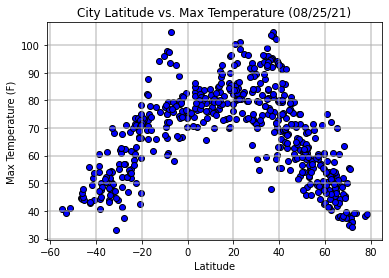

In [7]:
#Latitude vs Temperature scatter plot

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = "blue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (08/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data_weatherpy/Lat_vs_Temp")
print(" A scatter plot comparing Xax Temperature to Latitude")

## Latitude vs. Humidity Plot

 A scatter plot comparing Humidity to Latitude


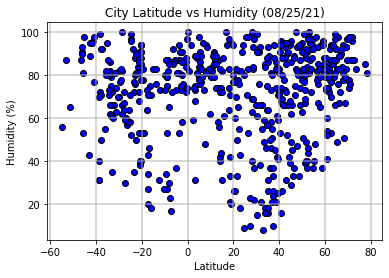

In [8]:
#Latitude vs Humidity scatter plot

plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "blue", edgecolor = "black")
plt.title("City Latitude vs Humidity (08/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data_weatherpy/Lat_vs_Humdity")
print(" A scatter plot comparing Humidity to Latitude")

## Latitude vs. Cloudiness Plot

 A scatter plot comparing Cloudiness to Latitude


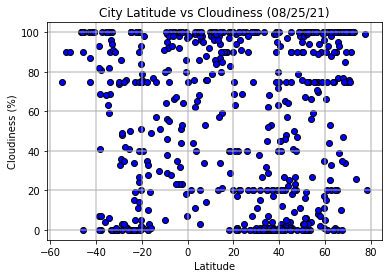

In [9]:
#Latitude vs Humidity scatter plot

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color = "blue", edgecolor = "black")
plt.title("City Latitude vs Cloudiness (08/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data_weatherpy/Lat_vs_Cloudiness")
print(" A scatter plot comparing Cloudiness to Latitude")

## Latitude vs. Wind Speed Plot

 A scatter plot comparing Wind Speed to Latitude


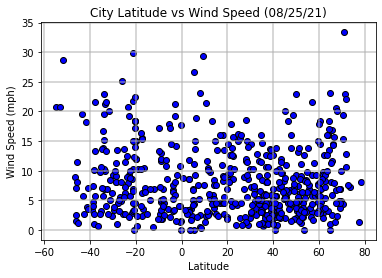

In [10]:
#Latitude vs Humidity scatter plot

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "blue", edgecolor = "black")
plt.title("City Latitude vs Wind Speed (08/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data_weatherpy/Lat_vs_Wind_Speed")
print(" A scatter plot comparing Wind Speed to Latitude")

## Linear Regression

In [13]:
northern_hemesphire = weather_df.loc[weather_df["Lat"] >= 0.0]
northern_hemesphire.reset_index(inplace=True)

southern_hemesphire = weather_df.loc[weather_df["Lat"] < 0.0]
southern_hemesphire.reset_index(inplace=True)

def linear_regression_plot(xdata,ydata,x_axis,y_axis,pos_label):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,pos_label,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
       

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7292369640133105
A linear regression analysis on Max Temp vs Latitude in the northern hemisphere shows a neggative correlation


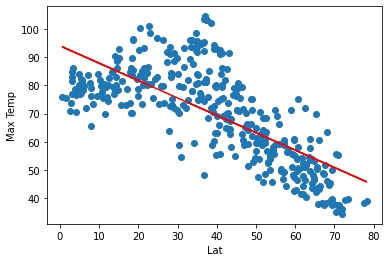

In [14]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Max Temp"
pos_label = (0,25)
linear_regression_plot(northern_hemesphire[x_axis],northern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/NH_LR_Temp_vs_Lat")
print("A linear regression analysis on Max Temp vs Latitude in the northern hemisphere shows a negative correlation")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7912109641803101
A linear regression analysis on Max Temp vs Latitude in the Southern hemisphere shows a positive correlation


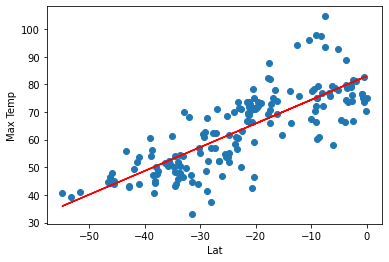

In [15]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Max Temp"
pos_label = (0,25)
linear_regression_plot(southern_hemesphire[x_axis],southern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/SH_LR_Temp_vs_Lat")
print("A linear regression analysis on Max Temp vs Latitude in the Southern hemisphere shows a positive correlation")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13232457259071229
A linear regression analysis on Humidity vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation


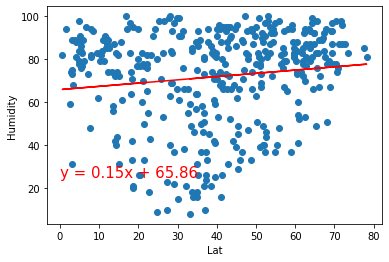

In [16]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Humidity"
pos_label = (0,25)
linear_regression_plot(northern_hemesphire[x_axis],northern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/NH_LR_Humidity_vs_Lat")
print("A linear regression analysis on Humidity vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.028275172628522995


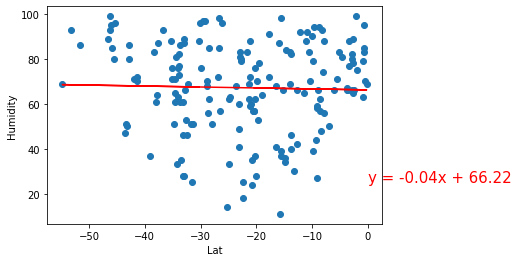

In [46]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Humidity"
pos_label = (0,25)
linear_regression_plot(southern_hemesphire[x_axis],southern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/SH_LR_Humidity_vs_Lat")
print("A linear regression analysis on Humidity vs Latitude in the Southern hemisphere shows a slightly negative correlation or no correlation")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04844203543403333
A linear regression analysis on Cloudiness vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation


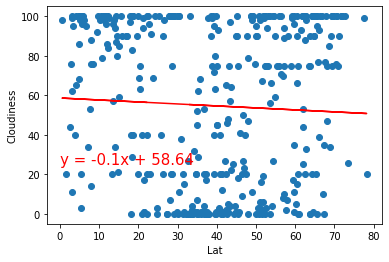

In [17]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Cloudiness"
pos_label = (0,25)
linear_regression_plot(northern_hemesphire[x_axis],northern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/NH_LR_Cloudiness_vs_Lat")
print("A linear regression analysis on Cloudiness vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03560676316669476


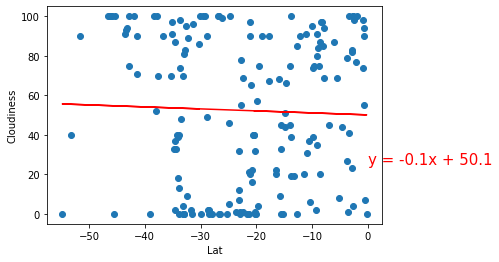

In [48]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Cloudiness"
pos_label = (0,25)
linear_regression_plot(southern_hemesphire[x_axis],southern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/SH_LR_Cloudiness_vs_Lat")
print("A linear regression analysis on Cloudiness vs Latitude in the southern hemisphere shows a slightly negative correlation or no correlation")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07375887473820408
A linear regression analysis on Wind Speed vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation


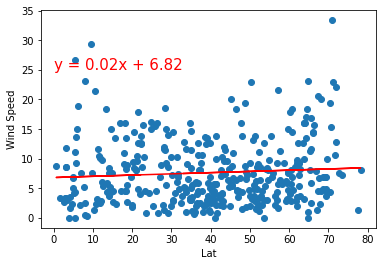

In [18]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Wind Speed"
pos_label = (0,25)
linear_regression_plot(northern_hemesphire[x_axis],northern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/NH_LR_Wind_vs_Lat")
print("A linear regression analysis on Wind Speed vs Latitude in the northern hemisphere shows a slightly positive correlation or no correlation")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12350875642754465
A linear regression analysis on Wind Speed vs Latitude in the southern hemisphere shows a negative correlation


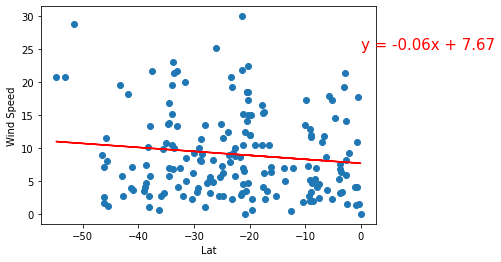

In [20]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_axis = "Lat"
y_axis = "Wind Speed"
pos_label = (0,25)
linear_regression_plot(southern_hemesphire[x_axis],southern_hemesphire[y_axis],x_axis,y_axis,pos_label)
plt.savefig("../output_data_weatherpy/SH_LR_Wind_vs_Lat")
print("A linear regression analysis on Wind Speed vs Latitude in the southern hemisphere shows a negative correlation")